### Problem Statement:

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


---------------------------------------------------------------------
### Import Libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier

### Import Data

In [2]:
comp_data = pd.read_csv('Company_Data.csv')
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
comp_data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


### Data Understanding

In [5]:
comp_data.shape

(400, 11)

In [6]:
comp_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
comp_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [8]:
comp_data.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [9]:
comp_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### Understanding the Target Variable 

In [10]:
comp_data['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

### Data Manipulation

In [11]:
encoder = LabelEncoder()

In [12]:
comp_data['ShelveLoc'] = encoder.fit_transform(comp_data['ShelveLoc'])
comp_data['Urban'] = encoder.fit_transform(comp_data['Urban'])
comp_data['US'] = encoder.fit_transform(comp_data['US'])
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


### Correlation of the features

In [13]:
corr = comp_data.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


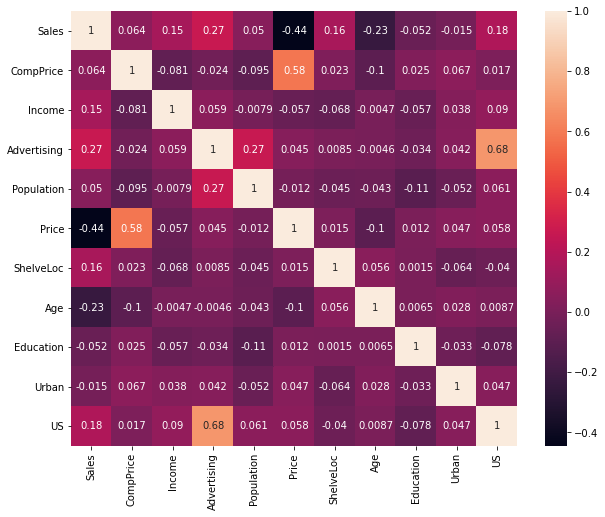

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data = corr, annot = True)
plt.show()

----
### Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"

In [15]:
sales_val = []
for value in comp_data["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
comp_data["sales_val"]= sales_val
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


### Uderstanding the new target variable after converting the numerical data of target variable into categorical data 

In [16]:
comp_data['sales_val'].unique()

array(['high', 'low'], dtype=object)

In [17]:
comp_data['sales_val'].value_counts()

low     201
high    199
Name: sales_val, dtype: int64

In [18]:
comp_data['sales_val'].count()

400

In [19]:
print('skewness of the dataset:\n','\n',comp_data.skew())
print('--------------------------------------------------------')
print('kurtosis values of the dataset:\n','\n',comp_data.kurtosis())

skewness of the dataset:
 
 Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
ShelveLoc     -0.627875
Age           -0.077182
Education      0.044007
Urban         -0.902426
US            -0.608327
dtype: float64
--------------------------------------------------------
kurtosis values of the dataset:
 
 Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
ShelveLoc     -1.273958
Age           -1.134392
Education     -1.298332
Urban         -1.191610
US            -1.638154
dtype: float64


Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


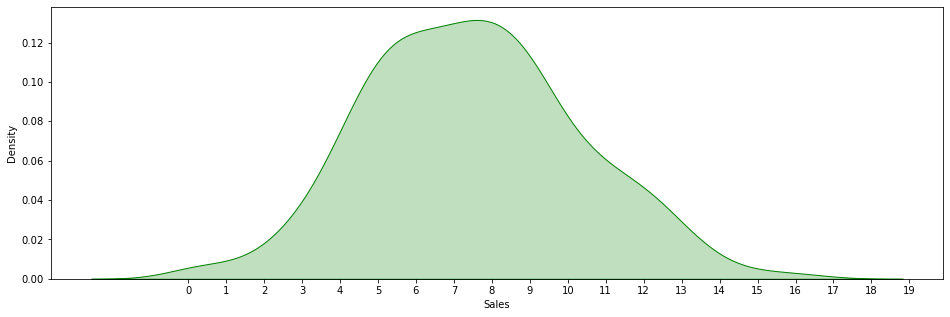

In [20]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(comp_data['Sales'].skew()))
print("Kurtosis: {}".format(comp_data['Sales'].kurtosis()))
ax = sns.kdeplot(comp_data['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is Skewed on the right
### The data has negative Kurtosis 
----

### Outlier Check 

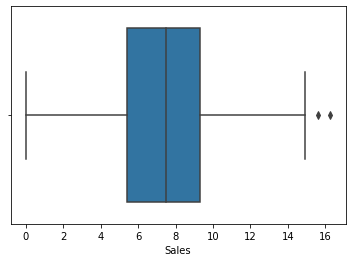

In [21]:
sns.boxplot(comp_data['Sales'])
plt.show()

### The target variable has 2 outlier instances

### Model Building

In [22]:
X = comp_data.drop(['Sales','sales_val'],axis=1)
y = comp_data[['sales_val']]

In [23]:
X.shape

(400, 10)

In [24]:
y.shape

(400, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [26]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [27]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

### Model Training

In [28]:
dt_model = DecisionTreeClassifier(max_depth= 3, criterion='gini')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Plot the tree

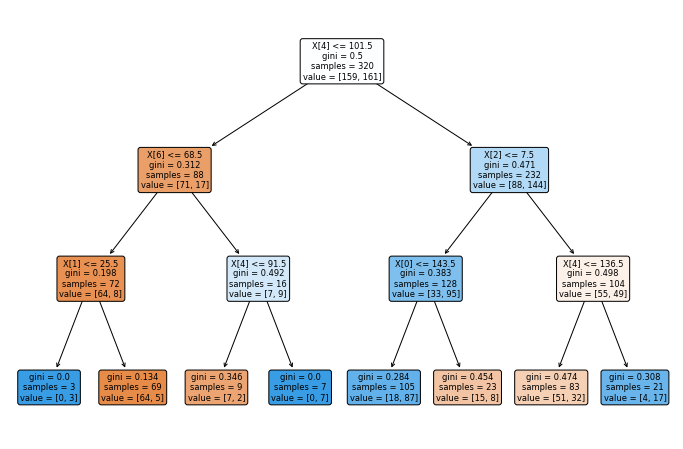

In [29]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree= dt_model , filled = True, rounded = True)
plt.show()

### Model Testing
---
### Training Data

In [30]:
y_pred_train = dt_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

high    184
low     136
dtype: int64

In [31]:
y_pred_train

array(['high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'low', 'high', 'low', 'low', 'high', 'low',
       'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'high',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'high', 'high', 'high', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'high', 'low', 'low', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'high',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'high', 'low', 'low', 'high', 'low', 'low',
       '

### Model Evaluation 
---
### Training Data

In [32]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.784375
---------------------------
Confusion Matrix         :
 [[137  22]
 [ 47 114]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        high       0.74      0.86      0.80       159
         low       0.84      0.71      0.77       161

    accuracy                           0.78       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.79      0.78      0.78       320



### Model Testing 
----
### Testing Data

In [33]:
y_pred_test = dt_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

high    43
low     37
dtype: int64

In [34]:
y_pred_test

array(['low', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'low', 'high', 'high', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'low'], dtype=object)

### Model Evaluation 
----
### Testing Data

In [35]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.6625
---------------------------
Confusion Matrix:
 [[28 12]
 [15 25]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        high       0.65      0.70      0.67        40
         low       0.68      0.62      0.65        40

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



### Automate the way for getting Optimal Values for Hyperparameter

In [36]:
grid_search_cv = GridSearchCV(estimator=dt_model,param_grid={'criterion':['entropy','gini'],
                                           'max_depth':[1,2,3,4,5,6,7,8,9,10]}, cv=5)
grid_search_cv.fit(X_train,y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 5}
0.771875


### Model Training

In [37]:
dt_model = DecisionTreeClassifier(max_depth= 9, criterion='entropy')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

### Model Testing
---
### Train Data

In [38]:
y_pred_train = dt_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

low     168
high    152
dtype: int64

In [39]:
y_pred_train

array(['low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'high',
       'high', 'high', 'high', 'low', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'high', 'high', 'high', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'high', 'high', 'low', 'hi

### Model Evaluation 
---
### Train Data

In [40]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.978125
---------------------------
Confusion Matrix         :
 [[152   7]
 [  0 161]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        high       1.00      0.96      0.98       159
         low       0.96      1.00      0.98       161

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



### Model Testing 
----
### Test Data

In [41]:
y_pred_test = dt_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

low     41
high    39
dtype: int64

In [42]:
y_pred_test

array(['high', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'high', 'low', 'low',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'high', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'low'], dtype=object)

### Model Evaluation 
----
### Test Data

In [43]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.7625
---------------------------
Confusion Matrix:
 [[30 10]
 [ 9 31]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        high       0.77      0.75      0.76        40
         low       0.76      0.78      0.77        40

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



 -----------

In [44]:
## Accuracy = (TP + TN) / (TP + FN + FP + TN)
## Error Rate = (FP + FN) / (TP + FN + FP + TN)

In [45]:
acc = (30+10)/(30+9+10+31)
acc

0.5

In [46]:
error_rate = (10+9)/(30+9+10+31)
error_rate

0.2375

In [47]:
## Accuracy = 1 – Error Rate
## Error Rate = 1 – Accuracy

In [48]:
accuracy = 1 - error_rate
accuracy

0.7625

In [49]:
error = 1-accuracy
error

0.23750000000000004

-----
### Check whether the dataset is balanced or not :

In [50]:
comp_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [51]:
comp_data['sales_val'].value_counts()

low     201
high    199
Name: sales_val, dtype: int64

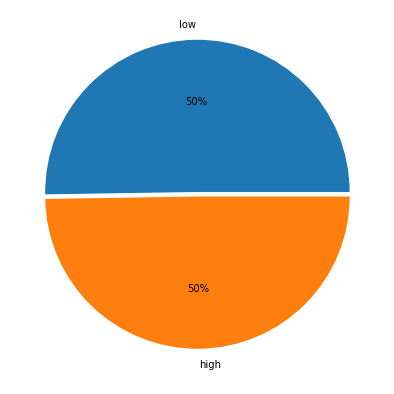

In [52]:
plt.figure(figsize=(8,7))
plt.pie(x = comp_data['sales_val'].value_counts(),explode=[0.03,0], labels=['low','high'],autopct='%1.0f%%')
plt.show()

### This is a balanced dataset !!!

### Model Training with Boosting Classifier

In [53]:
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

### Model Testing 
### Train Data 

In [54]:
gb_train = gb_model.predict(X_train)

### Model Evaluation
### Train Data

In [55]:
print('Accuracy Score           :', accuracy_score(y_train , gb_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , gb_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , gb_train))

Accuracy Score           : 0.990625
---------------------------
Confusion Matrix         :
 [[157   2]
 [  1 160]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        high       0.99      0.99      0.99       159
         low       0.99      0.99      0.99       161

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



### Model Testing 
### Test Data

In [56]:
gb_test = gb_model.predict(X_test)

### Model Evaluation
### Test Data

In [57]:
print('Accuracy Score:', accuracy_score(y_test , gb_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , gb_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , gb_test))

Accuracy Score: 0.8
---------------------------
Confusion Matrix:
 [[31  9]
 [ 7 33]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        high       0.82      0.78      0.79        40
         low       0.79      0.82      0.80        40

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



### Conclusion : As seen from the above models, ensemble model, that is Gradient Boosting Classifier gives the best accuracy score of 80% 
----
### So 80% of the attributes causes high sale.

### Plot the tree

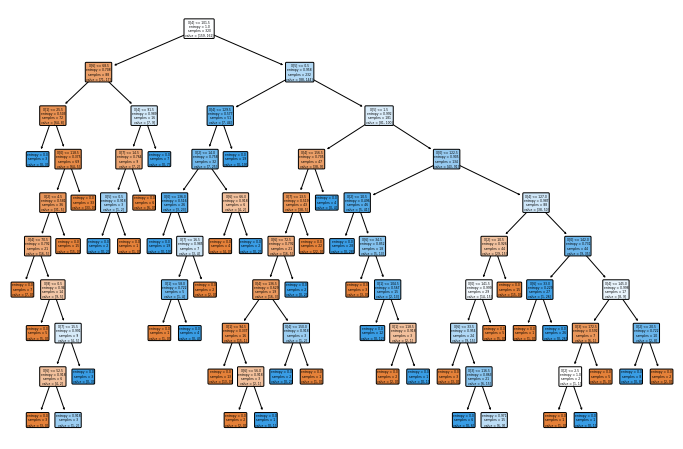

In [58]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree= dt_model , filled = True, rounded = True)
plt.show()

### Check the feature importance

In [59]:
dt_model.feature_importances_

array([0.12639808, 0.08294491, 0.12578604, 0.01884213, 0.2973723 ,
       0.1356179 , 0.14453668, 0.05447911, 0.01402284, 0.        ])

In [60]:
feature_imp = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [61]:
feature_imp

,feature,importance
4,Price,0.297372
6,Age,0.144537
5,ShelveLoc,0.135618
0,CompPrice,0.126398
2,Advertising,0.125786
1,Income,0.082945
7,Education,0.054479
3,Population,0.018842
8,Urban,0.014023
9,US,0.000000


### As seen in the above feature importance table, Price is most important feature of the company data dataset.

--------
### Model building with only the most important features 

In [62]:
comp_data_copy = comp_data.drop(['US', 'Urban','Population'], axis = 1)
comp_data_copy

,Sales,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Education,sales_val
0,9.50,138,73,11,120,0,42,17,high
1,11.22,111,48,16,83,1,65,10,high
2,10.06,113,35,10,80,2,59,12,high
3,7.40,117,100,4,97,2,55,14,low
4,4.15,141,64,3,128,0,38,13,low
...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,128,1,33,14,high
396,6.14,139,23,3,120,2,55,11,low
397,7.41,162,26,12,159,2,40,18,low
398,5.94,100,79,7,95,0,50,12,low


In [63]:
X = comp_data_copy.drop(['Sales','sales_val'],axis=1)
y = comp_data_copy[['sales_val']]

In [64]:
X.shape

(400, 7)

In [65]:
y.shape

(400, 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [67]:
X_train.shape,y_train.shape

((320, 7), (320, 1))

In [68]:
X_test.shape,y_test.shape

((80, 7), (80, 1))

### Model Training

In [69]:
dt_model = DecisionTreeClassifier(max_depth= 9, criterion='entropy')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

### Plot the tree

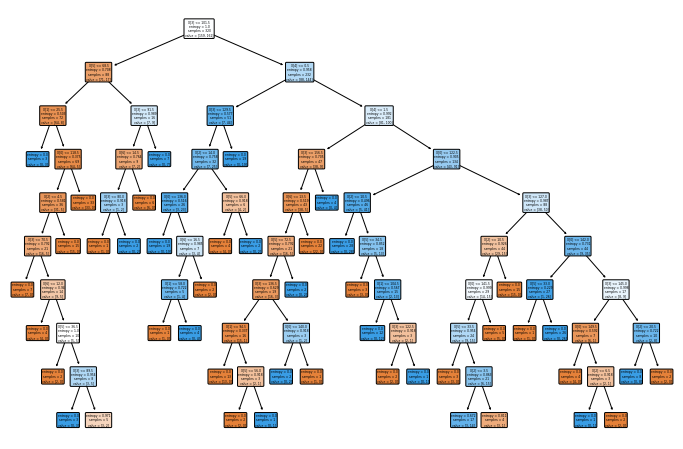

In [70]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree= dt_model , filled = True, rounded = True)
plt.show()

### Model Testing
---
### Training Data

In [71]:
y_pred_train = dt_model.predict(X_train)
pd.Series(y_pred_train).value_counts()

low     161
high    159
dtype: int64

In [72]:
y_pred_train

array(['low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'high', 'high', 'low', 'low', 'high', 'low',
       'high', 'high', 'low', 'low', 'high', 'high', 'high', 'low', 'low',
       'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'high', 'low', 'high', 'high', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'low', 'high', 'low', 'high', 'low', 'low', 'low', 'high', 'high',
       'low', 'high', 'low', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low'

### Model Evaluation 
---
### Training Data

In [73]:
print('Accuracy Score           :', accuracy_score(y_train , y_pred_train))
print('---------------------------')
print('Confusion Matrix         :\n', confusion_matrix(y_train , y_pred_train))
print('---------------------------')
print('Classification Report    :\n',classification_report(y_train , y_pred_train))

Accuracy Score           : 0.98125
---------------------------
Confusion Matrix         :
 [[156   3]
 [  3 158]]
---------------------------
Classification Report    :
               precision    recall  f1-score   support

        high       0.98      0.98      0.98       159
         low       0.98      0.98      0.98       161

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



### Model Testing 
----
### Testing Data

In [74]:
y_pred_test = dt_model.predict(X_test)
pd.Series(y_pred_test).value_counts()

high    45
low     35
dtype: int64

In [75]:
y_pred_test

array(['high', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'low', 'low',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'low',
       'high', 'low', 'high', 'low', 'low', 'low', 'high', 'high', 'high',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low'], dtype=object)

### Model Evaluation 
----
### Testing Data

In [76]:
print('Accuracy Score:', accuracy_score(y_test , y_pred_test))
print('---------------------------')
print('Confusion Matrix:\n', confusion_matrix(y_test , y_pred_test))
print('---------------------------')
print('Classification Report:\n',classification_report(y_test , y_pred_test))

Accuracy Score: 0.7375
---------------------------
Confusion Matrix:
 [[32  8]
 [13 27]]
---------------------------
Classification Report:
               precision    recall  f1-score   support

        high       0.71      0.80      0.75        40
         low       0.77      0.68      0.72        40

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80

